# Exploratory Data Analysis for Task 2. Named entity recognition + image classification

In this notebook, an analysis of two datasets for NER and image classification will be conducted.

## NER dataset with animal names

This dataset was generated through ChatGPT LLM because there is no existing dataset about animal names, so it was necessary to create one.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# For inline plotting in the notebook
%matplotlib inline

### Loading data

In [ ]:
df = pd.read_csv("animal_ner_dataset.csv")

In [ ]:
df.head()

,text,labels
0,The sun was shining brightly .,O O O O O O
1,A dog barked loudly in the distance .,O B-ANIMAL O O O O O O
2,She decided to adopt a cat from the shelter .,O O O O O B-ANIMAL O O O O
3,The elephant walked slowly across the savanna .,O B-ANIMAL O O O O O O
4,He saw a butterfly fluttering near the flowers .,O O O B-ANIMAL O O O O O


In [ ]:
df.tail()

,text,labels
643,"Amid a colorful street festival , dynamic perf...",O O O O O O O O O O O O O O O O O O O B-ANIMAL...
644,A peaceful dawn emerged over a sleepy suburb a...,O O O O O O O O O O O O O O O O O O O O O B-AN...
645,A solitary streetlamp illuminated a narrow pas...,O O O O O O O O O O O O O O O O O O O O O
646,"Under the clear sky , local musicians strummed...",O O O O O O O O O O O O O O O O O O O O O O O ...
647,As twilight descended on a historic boulevard ...,O O O O O O O O O O O O O O O O O O O O O O O ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    648 non-null    object
 1   labels  648 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


In [ ]:
print("Dataset shape:", df.shape)
print("\nFirst 5 entries:")
print(df.head())
print("\nMissing values:", df.isnull().sum())

Dataset shape: (648, 2)

First 5 entries:
                                               text  \
0                    The sun was shining brightly .   
1             A dog barked loudly in the distance .   
2     She decided to adopt a cat from the shelter .   
3   The elephant walked slowly across the savanna .   
4  He saw a butterfly fluttering near the flowers .   

                       labels  
0                 O O O O O O  
1      O B-ANIMAL O O O O O O  
2  O O O O O B-ANIMAL O O O O  
3      O B-ANIMAL O O O O O O  
4    O O O B-ANIMAL O O O O O  

Missing values: text      0
labels    0
dtype: int64


In [ ]:
# Entity distribution analysis
labels = [label for sublist in df['labels'].str.split() for label in sublist]
entity_counts = Counter(labels)

Text(0, 0.5, 'Count')

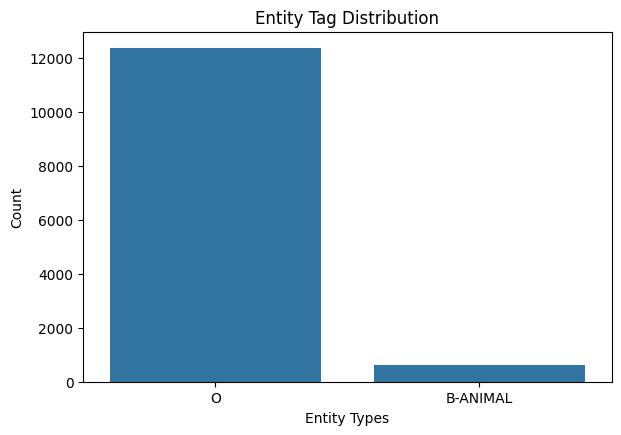

In [ ]:
# Visualization
plt.figure(figsize=(15, 10))

# Entity type distribution
plt.subplot(2, 2, 1)
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title('Entity Tag Distribution')
plt.xlabel('Entity Types')
plt.ylabel('Count')

In [ ]:
# Extract animal entities
animal_entities = []
for text, labels in zip(df['text'], df['labels']):
    tokens = text.split()
    tags = labels.split()
    for token, tag in zip(tokens, tags):
        if tag == 'B-ANIMAL':
            animal_entities.append(token.lower())

animal_freq = Counter(animal_entities)

Text(0, 0.5, 'Animal Names')

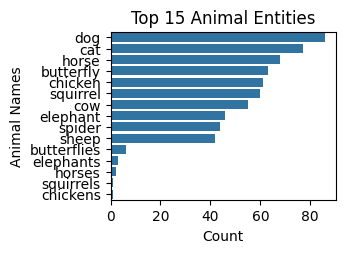

In [ ]:
# Top animal distribution
plt.subplot(2, 2, 2)
top_animals = animal_freq.most_common(15)
sns.barplot(x=[val[1] for val in top_animals], y=[val[0] for val in top_animals])
plt.title('Top 15 Animal Entities')
plt.xlabel('Count')
plt.ylabel('Animal Names')

Text(0.5, 0, 'Number of Tokens')

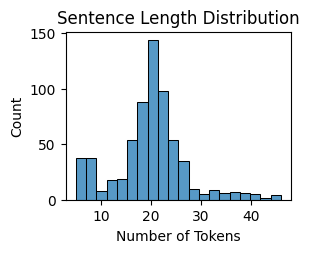

In [ ]:
# Sentence length analysis
df['sentence_length'] = df['text'].apply(lambda x: len(x.split()))
plt.subplot(2, 2, 3)
sns.histplot(df['sentence_length'], bins=20)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Tokens')

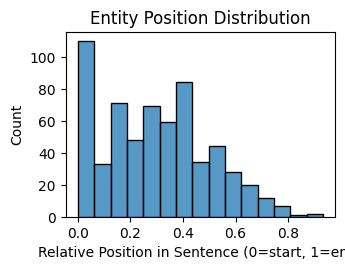

In [ ]:
# Entity position analysis
entity_positions = []
for text, labels in zip(df['text'], df['labels']):
    tokens = text.split()
    tags = labels.split()
    for i, (token, tag) in enumerate(zip(tokens, tags)):
        if tag == 'B-ANIMAL':
            position = i/len(tokens)  # Relative position in sentence
            entity_positions.append(position)

plt.subplot(2, 2, 4)
sns.histplot(entity_positions, bins=15)
plt.title('Entity Position Distribution')
plt.xlabel('Relative Position in Sentence (0=start, 1=end)')

plt.tight_layout()
plt.show()

In [ ]:
# Additional statistics
print("\nKey Statistics:")
print(f"Total animal entities: {len(animal_entities)}")
print(f"Unique animal types: {len(animal_freq)}")
print(f"Most common animal: {animal_freq.most_common(1)[0][0]} ({animal_freq.most_common(1)[0][1]} occurrences)")
print(f"Average sentence length: {df['sentence_length'].mean():.1f} tokens")
print(f"Longest sentence: {df['sentence_length'].max()} tokens")


Key Statistics:
Total animal entities: 622
Unique animal types: 22
Most common animal: dog (86 occurrences)
Average sentence length: 20.0 tokens
Longest sentence: 46 tokens


In [ ]:
# Show example sentences
print("\nExample Sentences with Entities:")
for i in range(3):
    text = df.iloc[i]['text']
    labels = df.iloc[i]['labels']
    print(f"\nSentence {i+1}:")
    print(" ".join([f"[{word}]" if tag == 'B-ANIMAL' else word
                  for word, tag in zip(text.split(), labels.split())]))


Example Sentences with Entities:

Sentence 1:
The sun was shining brightly .

Sentence 2:
A [dog] barked loudly in the distance .

Sentence 3:
She decided to adopt a [cat] from the shelter .


So, the dataset appears satisfactory despite some class imbalance between 'cat' and 'dog', and possibly nuances with multiple word pronunciations; however, it should be sufficient for training the NER model.

## Image Classification dataset Animals-10

For this task, the Animals-10 dataset might just be suitable

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import random
import os
import zipfile
import glob
import torch
from torchvision.transforms import v2

In [1]:
!kaggle datasets download alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 581M/586M [00:07<00:00, 76.9MB/s]
100% 586M/586M [00:07<00:00, 80.4MB/s]


In [4]:
with zipfile.ZipFile("/content/animals10.zip", "r") as zip_ref:
  zip_ref.extractall()

In [36]:
# The dataset has next classes, but they initially are in Italian, so here is a translate dict
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel"
}

dataset_path = "/content/raw-img/"
classes = os.listdir(dataset_path)

# Initialize data storage
image_data = []

In [9]:
# Loop through each item in the dataset directory
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)

    # Check if the item is a directory and its name is in our translation dictionary
    if os.path.isdir(folder_path) and folder in translate:
        new_folder_name = translate[folder]
        new_folder_path = os.path.join(dataset_path, new_folder_name)

        # Rename the folder
        os.rename(folder_path, new_folder_path)
        print(f"Renamed '{folder}' to '{new_folder_name}'")


Renamed 'elefante' to 'elephant'
Renamed 'scoiattolo' to 'squirrel'
Renamed 'farfalla' to 'butterfly'
Renamed 'mucca' to 'cow'
Renamed 'cavallo' to 'horse'
Renamed 'cane' to 'dog'
Renamed 'gatto' to 'cat'
Renamed 'gallina' to 'chicken'
Renamed 'pecora' to 'sheep'
Renamed 'ragno' to 'spider'


In [24]:
image_data = []
for class_folder in translate.values():  # Use translated class names
    class_path = os.path.join(dataset_path, class_folder, '*')
    for img_path in glob.glob(class_path):
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_data.append({
                'path': img_path,
                'class': class_folder
            })

df = pd.DataFrame(image_data)

In [25]:
df.head()

,path,class
0,/content/raw-img/dog/OIP-bHWySF9cMTil9ZSi7-fFK...,dog
1,/content/raw-img/dog/OIP-eUaNDRxAUwFXsxf9T9HCc...,dog
2,/content/raw-img/dog/OIP-eDF0rmOIXmIkW05haHN0s...,dog
3,/content/raw-img/dog/OIP-t7fJhv5ie5YyAN2lAxG_b...,dog
4,/content/raw-img/dog/OIP-lcrEGd7DDvuGE37URIXss...,dog


In [26]:
df.tail()

,path,class
26174,/content/raw-img/squirrel/OIP-nO9vaILQGjpyvzPQ...,squirrel
26175,/content/raw-img/squirrel/OIP-mww3rSnlk6qyMJ5K...,squirrel
26176,/content/raw-img/squirrel/OIP-YZv_9IdUTJrHFxxl...,squirrel
26177,/content/raw-img/squirrel/OIP-4pTpmjEtBf2VBXvQ...,squirrel
26178,/content/raw-img/squirrel/OIP-3XJVZ5mYfXAckzdu...,squirrel


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26179 entries, 0 to 26178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    26179 non-null  object
 1   class   26179 non-null  object
dtypes: object(2)
memory usage: 409.2+ KB


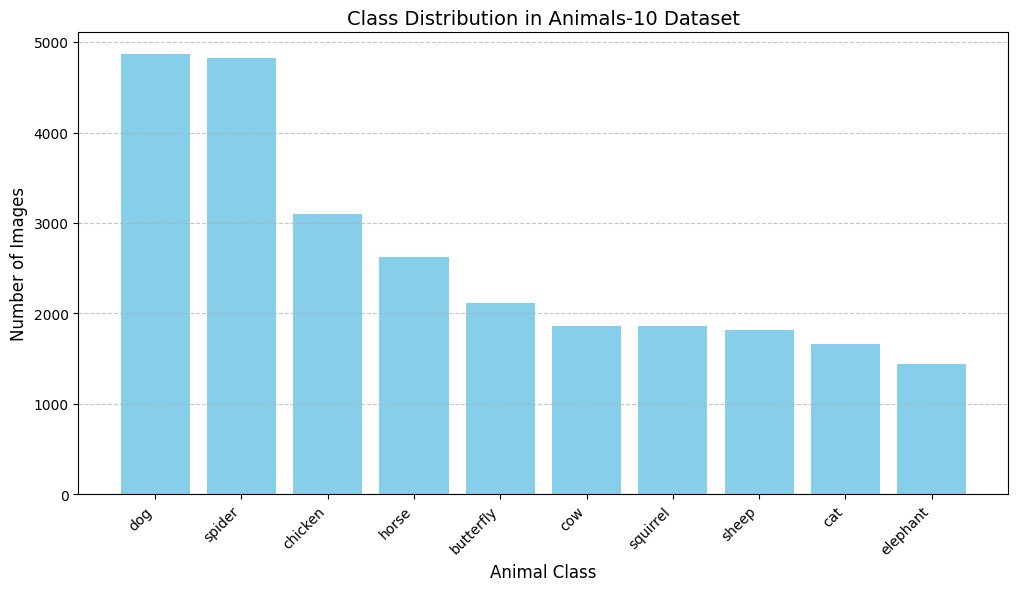

In [28]:
# Class distribution analysis
plt.figure(figsize=(12, 6))
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Class Distribution in Animals-10 Dataset', fontsize=14)
plt.xlabel('Animal Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
print(f"Total images: {len(df)}")
print(f"Number of classes: {len(class_counts)}")
print("\nClass counts:")
print(class_counts)

Total images: 26179
Number of classes: 10

Class counts:
class
dog          4863
spider       4821
chicken      3098
horse        2623
butterfly    2112
cow          1866
squirrel     1862
sheep        1820
cat          1668
elephant     1446
Name: count, dtype: int64


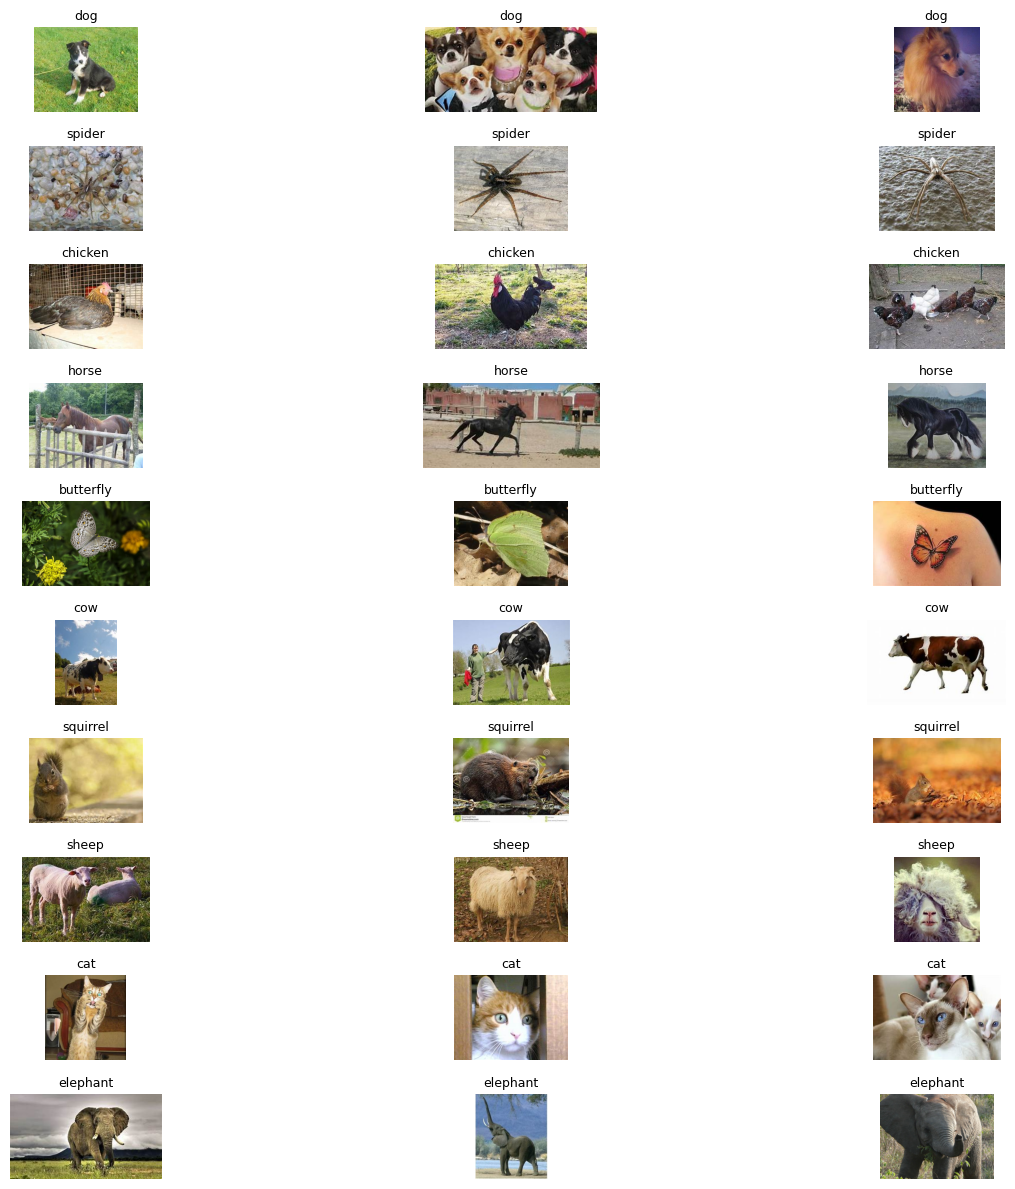

In [30]:
# Display sample images from each class
plt.figure(figsize=(15, 12))
for idx, animal_class in enumerate(class_counts.index):
    # Get 3 sample images per class
    samples = df[df['class'] == animal_class].sample(3)['path'].values

    for i in range(3):
        ax = plt.subplot(len(class_counts), 3, idx*3 + i + 1)
        img = Image.open(samples[i])
        plt.imshow(img)
        plt.title(animal_class, fontsize=9)
        plt.axis('off')
plt.tight_layout()
plt.show()

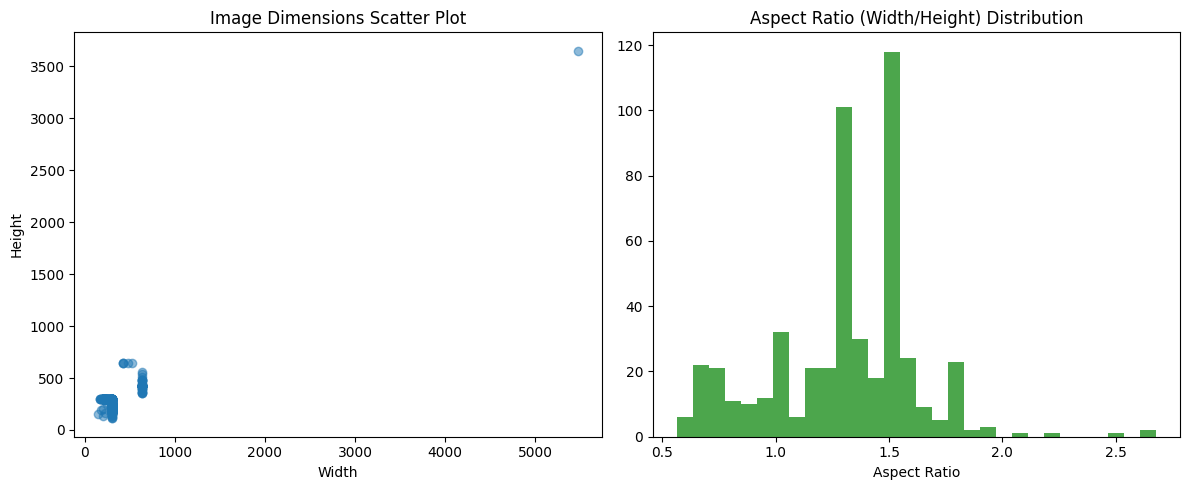

Average dimensions: 330.7x260.4
Min dimensions: 150x112
Max dimensions: 5472x3648


In [31]:
# Analyze image sizes and aspect ratios
dimensions = []
for img_path in df['path'].sample(500):  # Analyze subset for faster processing
    with Image.open(img_path) as img:
        dimensions.append(img.size)

widths, heights = zip(*dimensions)

# Plot dimensions distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Dimensions Scatter Plot')
plt.xlabel('Width')
plt.ylabel('Height')

plt.subplot(1, 2, 2)
plt.hist([w/h for w,h in dimensions], bins=30, color='green', alpha=0.7)
plt.title('Aspect Ratio (Width/Height) Distribution')
plt.xlabel('Aspect Ratio')
plt.tight_layout()
plt.show()

print(f"Average dimensions: {sum(widths)/len(widths):.1f}x{sum(heights)/len(heights):.1f}")
print(f"Min dimensions: {min(widths)}x{min(heights)}")
print(f"Max dimensions: {max(widths)}x{max(heights)}")

As we are going to use this dataset in PyTorch for neural networks training, let's try some transformations

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


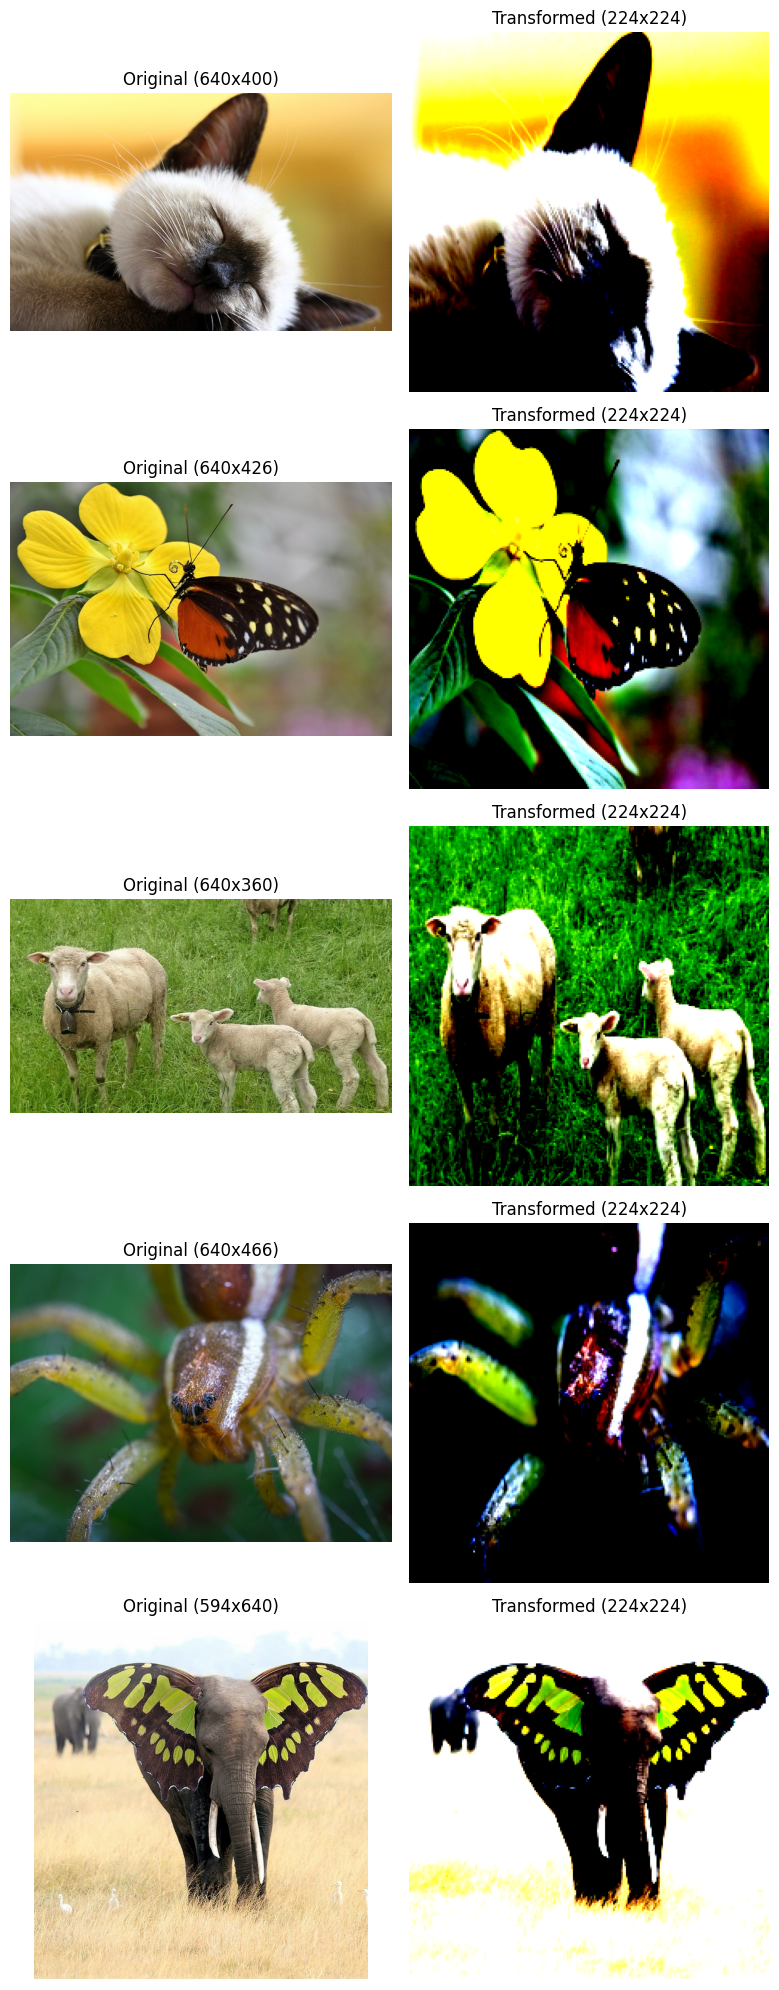

In [38]:
transform = v2.Compose([
    v2.Resize((224,224)),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Get one image per class
image_paths = []
for cls in class_folders:
    class_images = glob.glob(os.path.join(dataset_path, cls, "*.jpg"))
    if class_images:
        image_paths.append(class_images[0])

num_images = len(image_paths)
fig, axes = plt.subplots(num_images, 2, figsize=(8, 4 * num_images))  # Dynamic grid size

# Loop through images
for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)  # Load original image
    transformed_img = transform(img)  # Apply transformation
    transformed_img_pil = transformed_img.permute(1, 2, 0).numpy()  # Convert to HWC

    # Display original image
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Original ({img.size[0]}x{img.size[1]})")
    axes[i, 0].axis("off")

    # Display transformed image
    axes[i, 1].imshow(transformed_img_pil)
    axes[i, 1].set_title("Transformed (224x224)")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

So, the Animals-10 dataset, according to the analysis, might also be suitable for training the CNN.